### Ecommerce Customer - Example Case

using Python and Scikit-learn to apply linear regression to a fictional case:
- contract work with an Ecommerce company based in New York City 
- company sells clothing online but they also have in-store style and clothing advice sessions
- Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want

- company is trying to decide whether to focus their efforts on their mobile app experience or their website
- They've hired to get a recommendation

(customer data is fictional)

In [2]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# import data
df = pd.read_csv('Ecommerce Customers')

In [11]:
# view data
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
# exploratory analysis
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


** 'Avg. Session Length', 'Time on App' and 'Time on Website' in min, 'Length of Memebership' in years and 'Yearly Amount Spent' in €

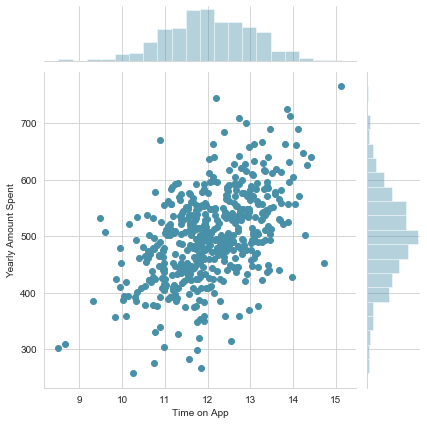

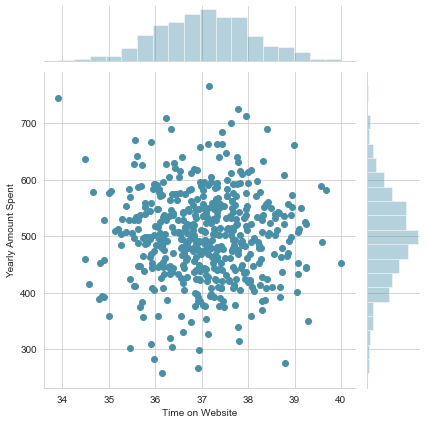

In [35]:
# create jointplot to get overview of distribution of 'Time on App'
# and 'Time on Website' compared to 'Yearly Amount Spent'

sns.set_style(style='whitegrid') # setting style for sns

sns.jointplot(df['Time on App'], df['Yearly Amount Spent'], color='#4890a8')

sns.jointplot(df['Time on Website'], df['Yearly Amount Spent'], color='#4890a8')


Maybe very slight hint of correlation between 'Yearly Amount Spent' and 'Time on App', no correlation between 'Yearly Amount Spent' and 'Time on Website' can be determined from looking at the distplot.

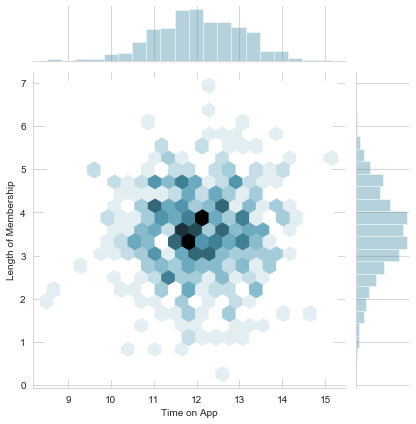

In [34]:
# using jointplot to create 2D hex bin plot comparing
# 'Time on App' and 'Length of Membership'

sns.jointplot(df['Time on App'], df['Length of Membership'], kind='hex', color='#4890a8')

Again, no direct correlation can be observed between the two variables

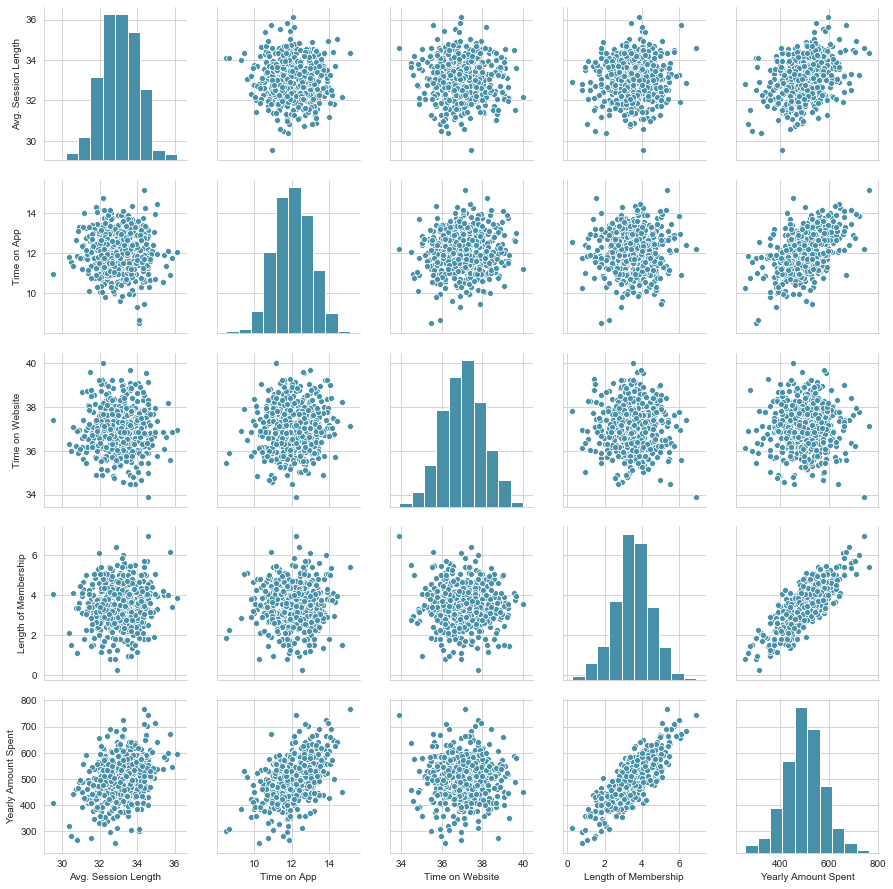

In [50]:
# exploring relationships across entire data set

sns.pairplot(df, plot_kws=dict(color='#4890a8'),
            diag_kws=dict(color='#4890a8'))

'Length of Membership' shows correlation with 'Yearly Amount Spent'

(5.0, 0.0)

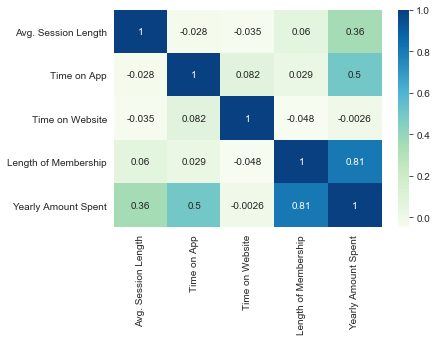

In [61]:
# reviewing correlation using a heatmap

sns.heatmap(df.corr(),annot=True, cmap='GnBu')

# fix for mpl bug that cuts off top/bottom of seaborn heatmap
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

As presumed, correlation is highest between 'Length of Membership' and 'Yearly Amount Spent' (0.81).

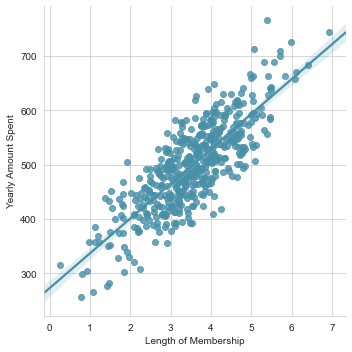

In [58]:
# looking at 'Length of Membership' compared to 'Yearly Amount Spent' in more detail

sns.lmplot('Length of Membership', 'Yearly Amount Spent', data=df,
           line_kws=dict(color='#4890a8'), scatter_kws=dict(color='#4890a8'))

Linear Model plot significantly shows correlation as well as type of relationship (positive).

In [62]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [65]:
# after exploration, linear regression is used to train and test a model for prediction

# first, data is split into train and test data

from sklearn.model_selection import train_test_split

X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [67]:
# importing linear Regression and creating instance of model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# fit the model on the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# coefficients for predictor variables
print(f'Coefficients:\n{lm.coef_}\n')

# intercept of linear regression model
print(f'Intercept:\n{lm.intercept_}')

Coefficients:
[25.98154972 38.59015875  0.19040528 61.27909654]

Intercept:
-1047.9327822502385


In [75]:
# showing predictors with respective coefficient
coef_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


With one unit increase of respective predictor, 'Yearly Amount Spent' increases by value of Coefficient. Highest is 'Length of Membership', followed by 'Time on App'.

In [78]:
# getting predicted values for test data using fitted model
predictions = lm.predict(X_test)


Text(0.5, 0, 'Y Test')

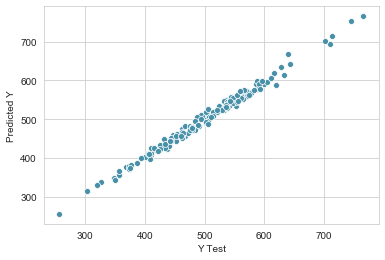

In [87]:
# using a scatterplot to show predicted values
sns.scatterplot(y_test,predictions, color='#4890a8')
plt.ylabel('Predicted Y')
plt.xlabel('Y Test')

In [91]:
# to evaluate fit of model, RSS (residual sum of squares) and R^2 will be calculated

# Calculating Mean Absolute Error, Mean Squared Error and Root Mean Squared Error

import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('R^2:', metrics.r2_score(y_test, predictions))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642
R^2: 0.9890046246741234


R^2 of 0.989 shows that 98.9% of variance in 'Yearly Amount Spent' can be explained through the predictor variables. This is a strong relationship.

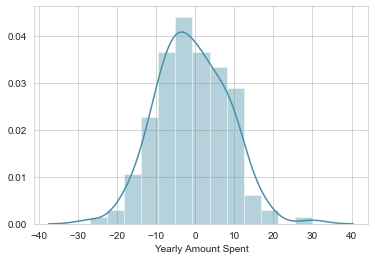

In [94]:
# lastly, fit of linear relationship is tested based on distribution of residuals

sns.distplot((y_test-predictions), color='#4890a8')

A near normal distribution shows that linear  model fits well with data.

##### Overall, the company should focus more on their mobile app, as coefficient show a stronger effect of 'Time on App' (β = 38.6) compared to 'Time on Website' (β = 26.0) on 'Yearly Amount Spent'.

Also important, the longer a consumer stays loyal, the more they spent on a yearly basis.